In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from joblib import dump
import seaborn as sns


In [16]:
# df1 = pd.read_csv("undark.csv")
# df2 = pd.read_csv("dark_patterns.csv")

# #Remove null strings in Pattern String Column
# df1 = df1[pd.notnull(df1["Pattern String"])]
# df1 = df1.drop_duplicates()

# # Apply the condition
# df1['Deceptive?'] = np.where(df1['Deceptive?'] == 0, 'No', 'Yes')
# col = ["Pattern String", "Deceptive?"]
# df1= df1[col]
# df1['Deceptive?'].value_counts()

# df2 = df2[pd.notnull(df2["Pattern String"])]
# df2 = df2.drop_duplicates()
# #df2['Deceptive?'].replace({'Yes': 1, 'No': 0}, inplace=True)
# df2.loc[df2['Deceptive?'] == 'Depends', 'Deceptive?'] = "Yes"
# col = ["Pattern String", "Deceptive?"]
# df2 = df2[col]
# print(df2["Deceptive?"].value_counts())

# final_df = pd.concat([df1, df2])


# label_encoder = LabelEncoder()
# # Fit and transform the column
# final_df['Deceptive?'] = label_encoder.fit_transform(final_df['Deceptive?'])

final_df = pd.read_csv("dataset.tsv", sep="\t")
final_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
2351,1304,Bra Panty Set,0,Not Dark Pattern
2352,1038,DressesFootwearHatsHoodies & SweatshirtsJersey...,0,Not Dark Pattern
2353,1081,Only 4 left in stock,1,Scarcity
2354,767,Trending Players,0,Not Dark Pattern


In [17]:
# Calculate class distribution
class_distribution = final_df['label'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate class imbalance ratio
imbalance_ratio = class_distribution.min() / class_distribution.max()

# Print class imbalance ratio
print("\nClass Imbalance Ratio:", imbalance_ratio)

Class Distribution:
1    1178
0    1178
Name: label, dtype: int64

Class Imbalance Ratio: 1.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df['text'], final_df["label"], train_size = .7, random_state=42)
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train)
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(y_train.dtype)
print(y_train.unique())


int64
[1 0]


In [19]:
# Create TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)


In [20]:

# Create an array to store accuracies
accuracies = []

# Create an array to store ROC AUC scores
roc_auc_scores = []

# Create an array to store precision scores
precisions = []

# Create an array to store recall scores
recalls = []

# Create an array to store F1 scores
f1_scores = []


Best parameters for Bernoulli Naive Bayes:  {'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': True}


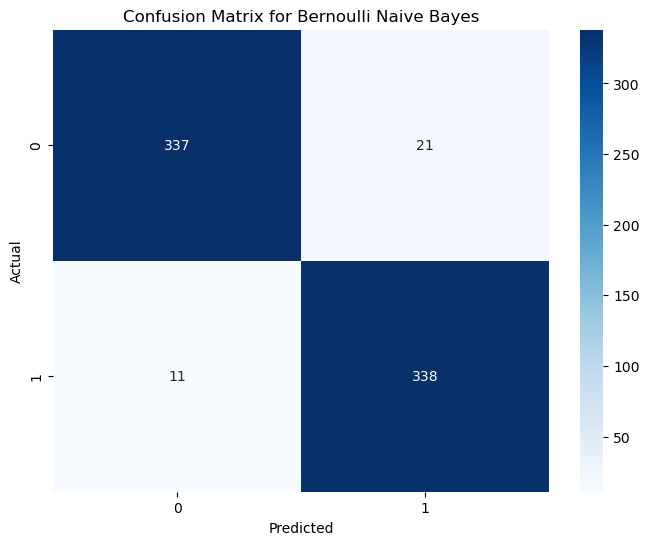

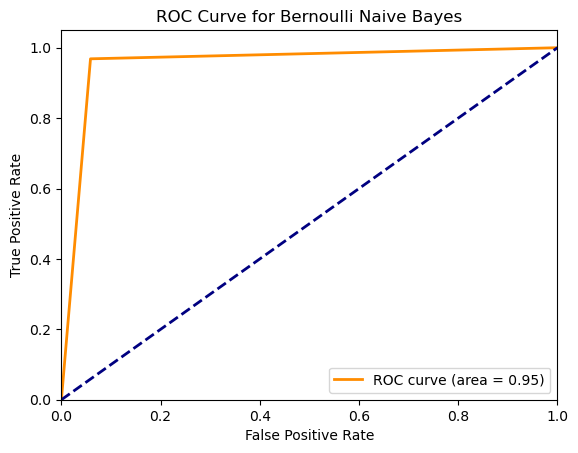

Best parameters for Logistic Regression:  {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__use_idf': True}


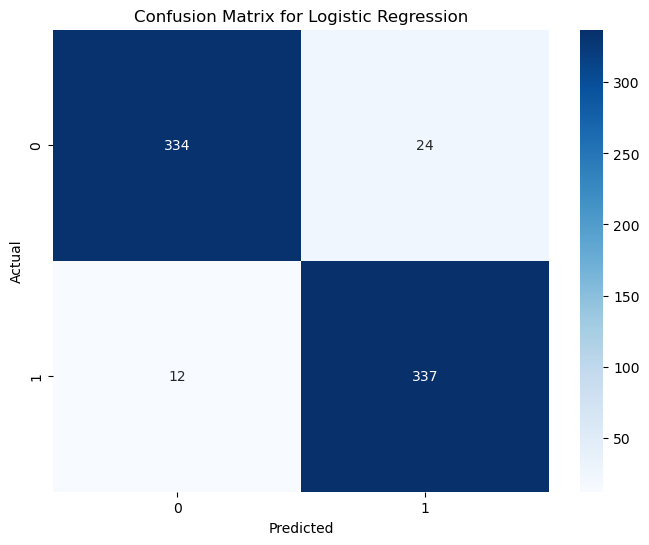

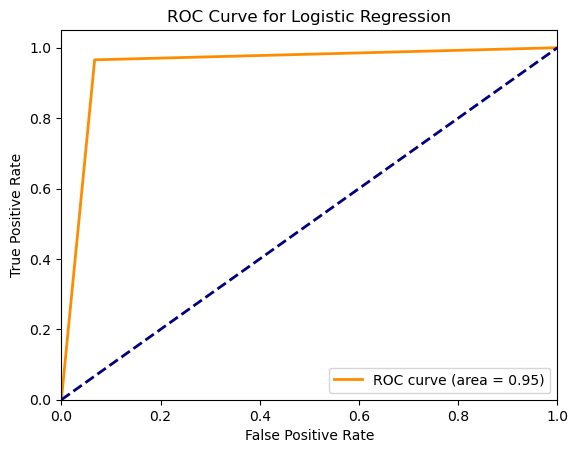

Best parameters for Support Vector Machine:  {'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__use_idf': True}


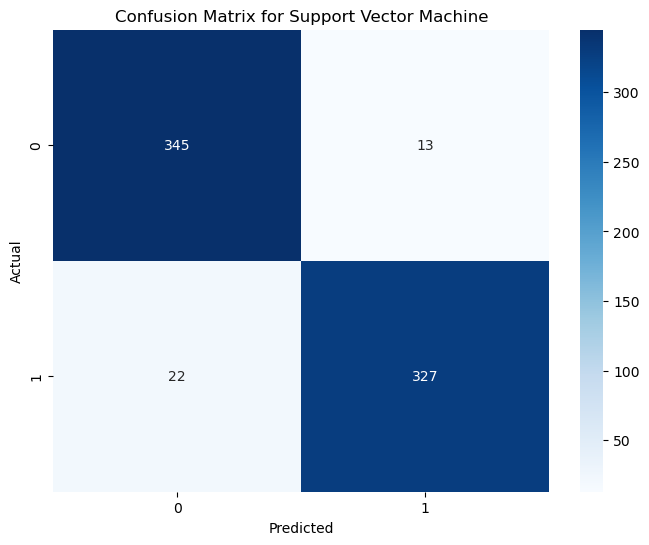

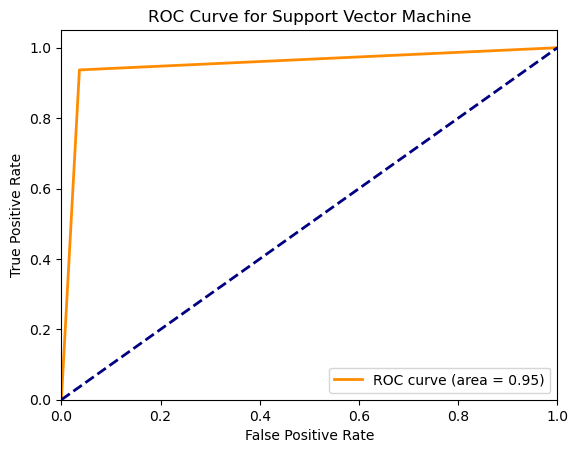

Best parameters for Random Forest:  {'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': False}


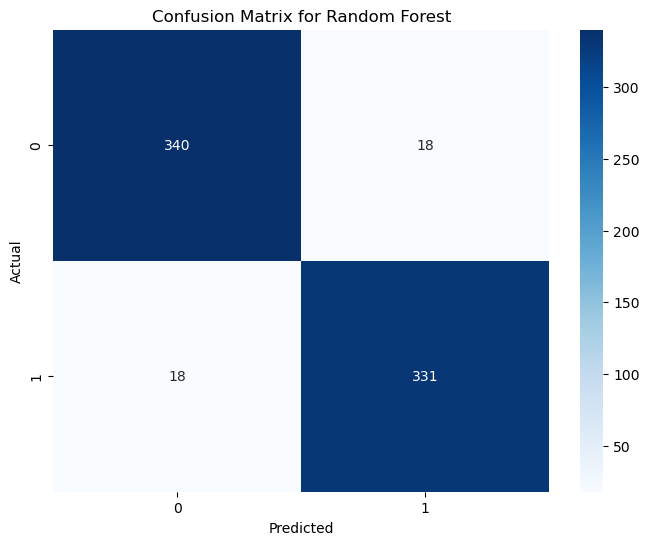

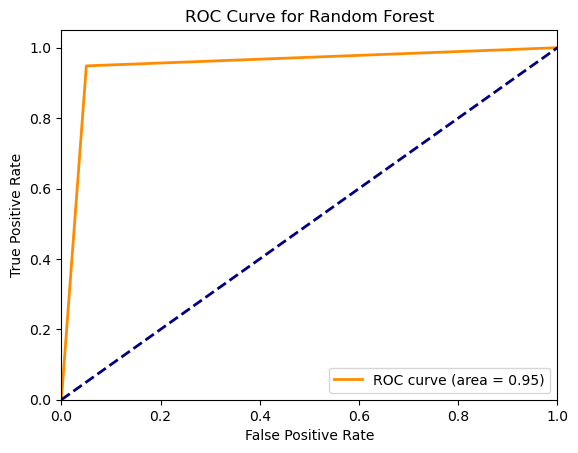

Best parameters for Gradient Boosting:  {'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': False}


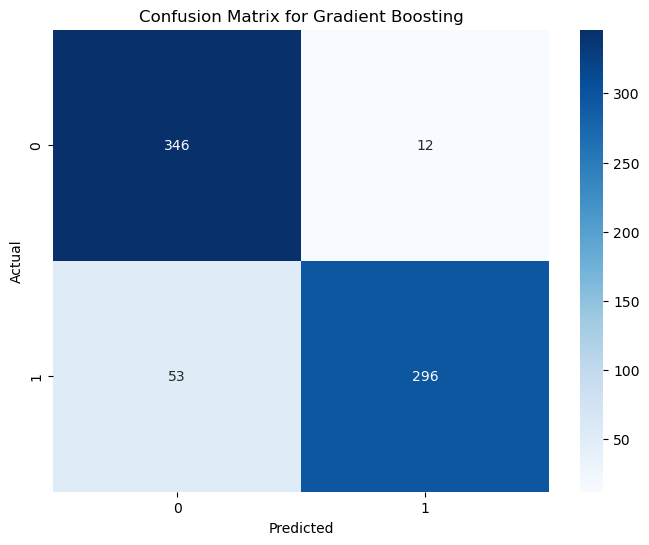

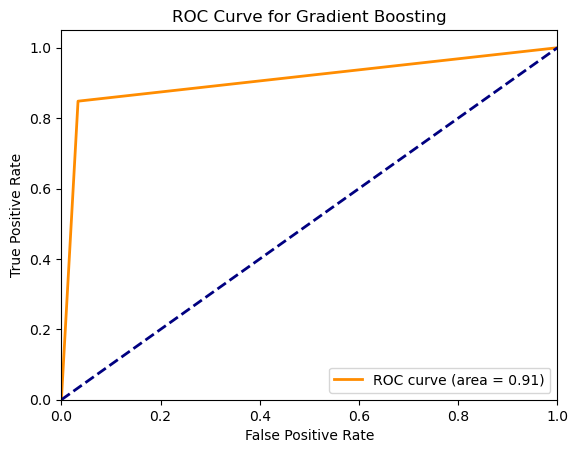

Bernoulli Naive Bayes Accuracy: 0.9547
Logistic Regression Accuracy: 0.9491
Support Vector Machine Accuracy: 0.9505
Random Forest Accuracy: 0.9477
Gradient Boosting Accuracy: 0.9109
Bernoulli Naive Bayes Accuracy: 0.9547
Logistic Regression Accuracy: 0.9491
Support Vector Machine Accuracy: 0.9505
Random Forest Accuracy: 0.9491
Gradient Boosting Accuracy: 0.9081
Bernoulli Naive Bayes Precision: 0.9415
Logistic Regression Precision: 0.9335
Support Vector Machine Precision: 0.9618
Random Forest Precision: 0.9432
Gradient Boosting Precision: 0.9613
Bernoulli Naive Bayes Precision: 0.9415
Logistic Regression Precision: 0.9335
Support Vector Machine Precision: 0.9618
Random Forest Precision: 0.9484
Gradient Boosting Precision: 0.9610
Bernoulli Naive Bayes Recall: 0.9685
Logistic Regression Recall: 0.9656
Support Vector Machine Recall: 0.9370
Random Forest Recall: 0.9513
Gradient Boosting Recall: 0.8539
Bernoulli Naive Bayes Recall: 0.9685
Logistic Regression Recall: 0.9656
Support Vector Mac

In [22]:


# Create a dictionary to hold the classifiers
classifiers = {
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Iterate through classifiers
for name, clf in classifiers.items():
    # Create a pipeline with vectorizer and classifier
    text_clf = make_pipeline(TfidfVectorizer(), clf)
    
    # Define the parameter grid for grid search
    parameters = {
        'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
        'tfidfvectorizer__use_idf': (True, False),
    }

    # Adjust parameters for Logistic Regression
    if name == 'Logistic Regression':
        parameters['logisticregression__C'] = [0.001, 0.01, 0.1, 1, 10, 100]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(text_clf, parameters, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters found by grid search
    print(f"Best parameters for {name}: ", grid_search.best_params_)

    # Fit the model with the best parameters
    best_clf = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)
    
     # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies.append((name, acc))
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precisions.append((name, precision))
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recalls.append((name, recall))
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append((name, f1))
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculate ROC AUC score
    roc_auc_score_val = roc_auc_score(y_test, y_pred)
    roc_auc_scores.append((name, roc_auc_score_val))

# Print the results
for name, acc in accuracies:
    print(f'{name} Accuracy: {acc:.4f}')

for name, precision in precisions:
    print(f'{name} Precision: {precision:.4f}')
    
for name, recall in recalls:
    print(f'{name} Recall: {recall:.4f}')
    
for name, f1 in f1_scores:
    print(f'{name} F1 Score: {f1:.4f}')

for name, roc_auc in roc_auc_scores:
    print(f'{name} ROC AUC Score: {roc_auc:.4f}')

In [23]:
# Evaluate the best performing classifier on the test set
best_classifier_name, best_classifier_acc = max(accuracies, key=lambda x: x[1])
print(f"\nBest Performing Classifier: {best_classifier_name}, Accuracy: {best_classifier_acc:.4f}")


Best Performing Classifier: Bernoulli Naive Bayes, Accuracy: 0.9547


In [24]:
# Save the best model to disk
best_classifier_name, best_classifier_acc = max(accuracies, key=lambda x: x[1])
best_model = make_pipeline(vectorizer, classifiers[best_classifier_name])
dump(best_model, 'best_model_presenceClassifier_newdataset.joblib')

['best_model_presenceClassifier_newdataset.joblib']